# EDA and Modelling on `patient-data.csv`

This notebook performs Exploratory Data Analysis (EDA) and basic data integrity checks on the `patient-data.csv` file. The steps include:

1. Data loading and overview
2. Data integrity checks (missing data, shape)
3. Level of measurement identification
4. Descriptive statistics for each column

---

In [12]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("../data/patient-data.csv")
df.head()

p01         p02        p03          p04          p05       p06  \
0  123.267876  178.595162  16.399606  410204.1015  8834.625206  4.809562   
1   78.099990  125.917170  17.343260  421416.3821  7551.743543  4.650226   
2  102.281198  133.735334  15.709720  267971.2381  6030.085265  4.623836   
3   79.183690  125.291132  15.201283  204385.8555  4507.019659  4.352788   
4   82.117428  187.164685  17.452967  384908.4868  7096.110188  4.696469   

         p07        p08        p09        p10  ...       p16         p17  \
0  42.033429  92.318682  27.004825  35.257693  ...  5.041603   81.518196   
1  40.209919  85.496273  28.292545  34.059034  ...  5.799974  109.089298   
2  46.893548  85.234094  32.408743  32.082015  ...  4.964792   92.357938   
3  38.891841  93.113226  27.778412  34.040408  ...  4.000000   70.448002   
4  50.803614  88.335091  28.600120  35.299643  ...  4.884780   77.147088   

         p18        p19        p20        p21       p22       p23       p24  \
0  49.968044  11.828202  28.273439  97.398323  0.649258  0.018998  2.891522   
1  41.420259  40.000000  20.125301  85.016603  1.023012  0.033543  1.499165   
2  48.048329  10.000000  25.097262  74.378111  0.862670  0.032801  2.929267   
3  56.574596  18.282211  27.763620  65.041476  0.911120  0.026088  1.321096   
4  43.833396  10.259593  26.937302  92.952192  0.687618  0.032591  0.340852   

    Ailment  
0   Healthy  
1  Diabetes  
2  Thalasse  
3    Anemia  
4  Thalasse  

[5 rows x 25 columns]

## 1. Data Overview
- Number of rows and columns
- Column names and data types

In [2]:
# Shape and columns
display(df.shape)
display(df.columns)
display(df.dtypes)

(2371, 25)

Index(['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10',
       'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20',
       'p21', 'p22', 'p23', 'p24', 'Ailment'],
      dtype='object')

p01        float64
p02        float64
p03        float64
p04        float64
p05        float64
p06        float64
p07        float64
p08        float64
p09        float64
p10        float64
p11        float64
p12        float64
p13        float64
p14        float64
p15        float64
p16        float64
p17        float64
p18        float64
p19        float64
p20        float64
p21        float64
p22        float64
p23        float64
p24        float64
Ailment     object
dtype: object

## 2. Data Integrity Checks
- Check for missing values
- Summary of missing data per column

In [13]:
# Missing values summary
missing_counts = df.isnull().sum()
missing_perc = df.isnull().mean() * 100
missing_df = pd.DataFrame({'MissingCount': missing_counts, 'MissingPercent': missing_perc})
display(missing_df)

MissingCount  MissingPercent
p01                 0        0.000000
p02                 0        0.000000
p03                 1        0.042176
p04                 1        0.042176
p05                 1        0.042176
p06                 1        0.042176
p07                 1        0.042176
p08                 1        0.042176
p09                 1        0.042176
p10                 1        0.042176
p11                 1        0.042176
p12                 1        0.042176
p13                 1        0.042176
p14                 1        0.042176
p15                 2        0.084353
p16                 2        0.084353
p17                 1        0.042176
p18                 1        0.042176
p19                 1        0.042176
p20                 1        0.042176
p21                 1        0.042176
p22                 1        0.042176
p23                 0        0.000000
p24                 0        0.000000
Ailment             2        0.084353

## 3. Level of Measurement
- Identify the level of measurement (nominal, ordinal, interval, ratio) for each column
- (Manual step: Please review column meanings and fill in as appropriate)

In [14]:
# Example: List columns and unique values for manual review
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")

p01: [123.2678758   78.09998965 102.2811979   79.18368977  82.1174278
 134.8649334   95.05762866  98.36820333 122.0126662   98.95502774]
p02: [178.5951617 125.9171696 133.735334  125.2911319 187.1646851 145.7109254
 187.6297692 166.6722353 149.2031427 144.8310344]
p03: [16.39960592 17.34325959 15.70972001 15.20128276 17.45296713 17.29598051
 16.56843664 16.65978868 15.47854893 14.69393394]
p04: [410204.1015 421416.3821 267971.2381 204385.8555 384908.4868 253512.7979
 150000.     175450.6998 207236.9042 163176.0808]
p05: [ 8834.625206  7551.743543  6030.085265  4507.019659  7096.110188
  6596.950284  5552.874403 10534.1209    6797.411862  4245.27034 ]
p06: [4.80956154 4.6502261  4.6238358  4.35278752 4.69646872 4.51722523
 4.67796333 4.96355557 5.05998933 4.6666938 ]
p07: [42.03342928 40.20991897 46.89354796 38.89184104 50.80361446 50.87637332
 43.44618517 47.75796071 50.17079308 45.78127401]
p08: [92.31868178 85.49627315 85.23409435 93.11322561 88.33509114 99.79385235
 88.74125806 87.0

## 4. Descriptive Statistics
- Summary statistics for each column (mean, std, min, max, etc.)
- Frequency tables for categorical columns

In [15]:
# Numeric columns
display(df.describe())

# Categorical columns
df_cat = df.select_dtypes(include=['object', 'category'])
for col in df_cat.columns:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())

p01          p02          p03            p04           p05  \
count  2371.000000  2371.000000  2370.000000    2370.000000   2370.000000   
mean     95.723590   157.056068    15.875821  299642.033487   7576.392817   
std      18.391307    20.086634     1.108117   92072.554351   1975.407145   
min      70.000000   125.000000    13.500000  150000.000000   4000.000000   
25%      79.045276   140.428465    14.841100  207236.904200   5779.743222   
50%      94.910515   157.334147    15.976076  308502.921600   7692.153435   
75%     111.766345   172.881629    16.716185  375652.950400   9232.441784   
max     140.000000   200.000000    17.500000  450000.000000  11000.000000   

               p06          p07          p08          p09          p10  ...  \
count  2370.000000  2370.000000  2370.000000  2370.000000  2370.000000  ...   
mean      4.781409    45.176374    89.368838    30.012760    34.288155  ...   
std       0.334514     4.130930     5.810423     1.964813     1.128564  ...   
min       4.200000    38.000000    80.000000    27.000000    32.000000  ...   
25%       4.475088    42.006265    85.074023    28.292545    33.440483  ...   
50%       4.731108    44.982337    88.564827    29.618746    34.464026  ...   
75%       5.078057    48.754763    94.243097    31.846506    35.032851  ...   
max       5.400000    52.000000   100.000000    33.000000    36.000000  ...   

               p15          p16          p17          p18          p19  \
count  2369.000000  2369.000000  2370.000000  2370.000000  2370.000000   
mean     88.251874     4.904990    94.604228    50.659141    23.748406   
std      26.647529     0.565004    15.925514     5.686841     8.590197   
min      50.000000     4.000000    70.000000    40.000000    10.000000   
25%      68.522902     4.369382    81.656821    45.463188    16.539442   
50%      82.282068     4.963892    93.982213    49.968044    21.740315   
75%     110.705664     5.362492   106.078371    55.577814    32.551651   
max     150.000000     6.000000   130.000000    60.000000    40.000000   

               p20          p21          p22          p23          p24  
count  2370.000000  2370.000000  2370.000000  2371.000000  2371.000000  
mean     23.445505    81.200410     0.868532     0.018510     1.610787  
std       7.405850    11.370365     0.152437     0.010415     0.919862  
min      10.000000    60.000000     0.600000     0.000000     0.000000  
25%      16.927927    70.244560     0.727196     0.011663     0.723767  
50%      24.467557    82.500163     0.862670     0.017378     1.803444  
75%      28.437110    91.104974     0.988298     0.027957     2.370219  
max      40.000000   100.000000     1.200000     0.040000     3.000000  

[8 rows x 24 columns]


Value counts for Ailment:


Ailment
Anemia           623
Healthy          556
Diabetes         539
Thalasse         508
Thromboc         123
Heart Disease     20
Name: count, dtype: int64

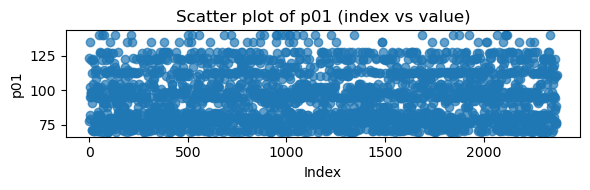

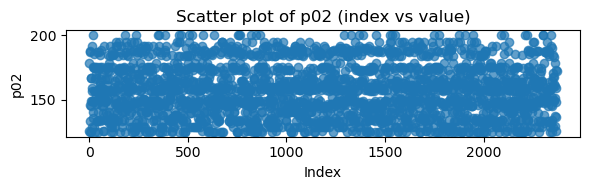

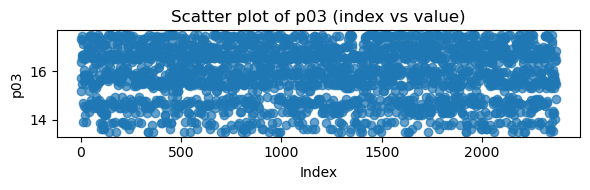

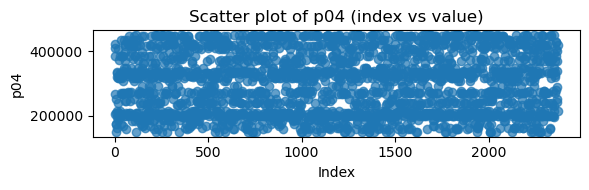

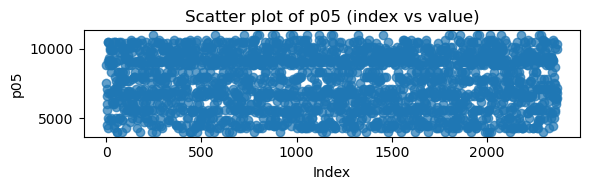

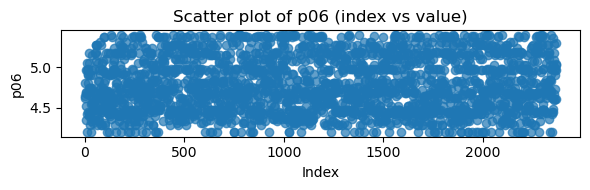

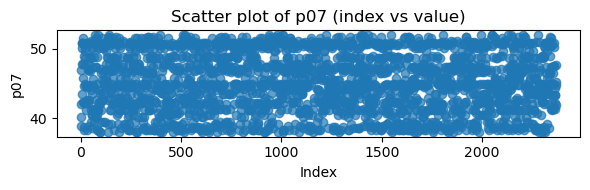

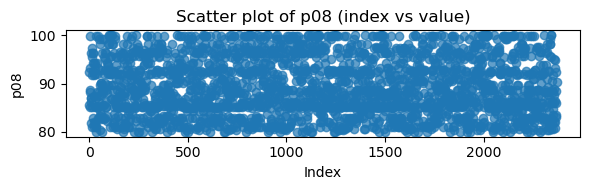

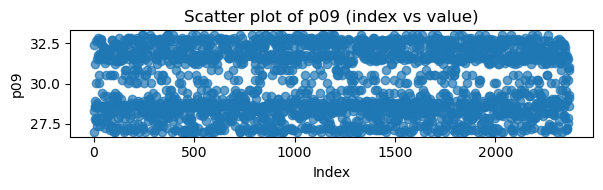

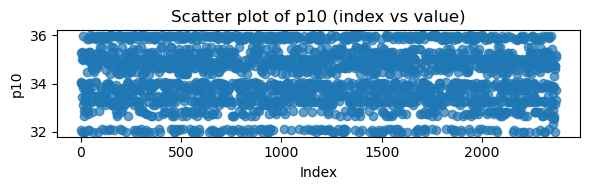

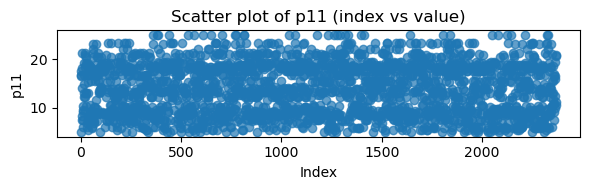

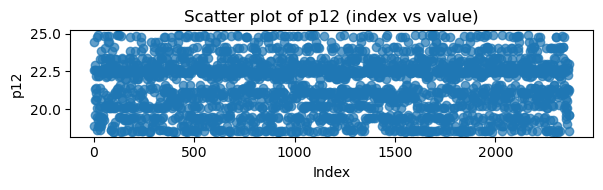

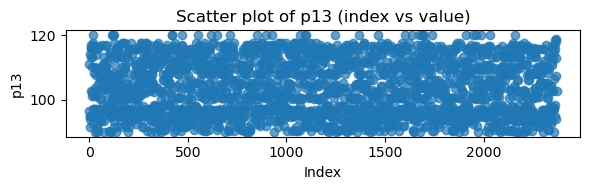

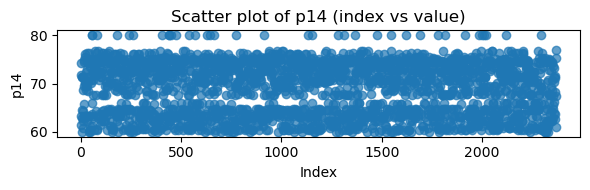

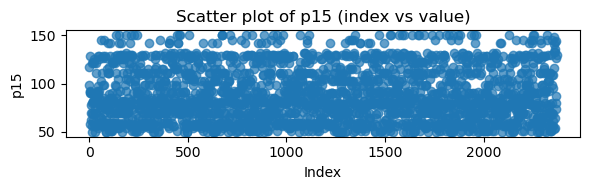

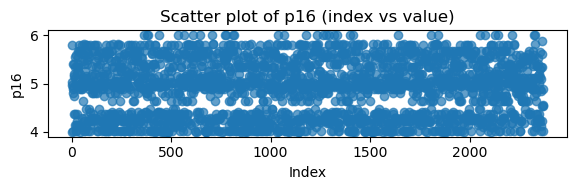

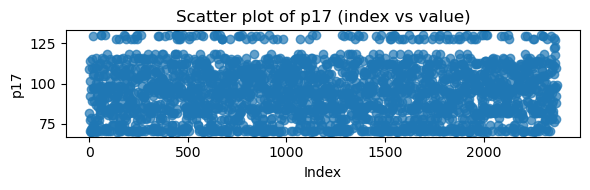

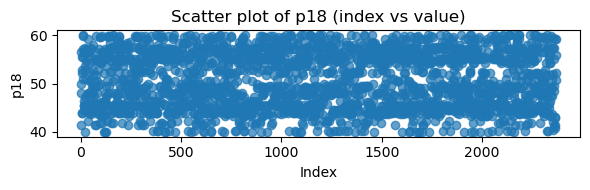

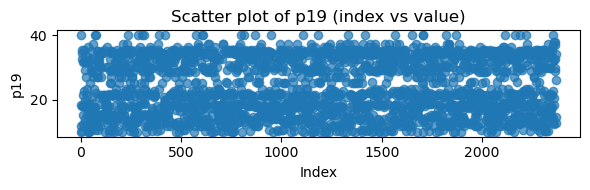

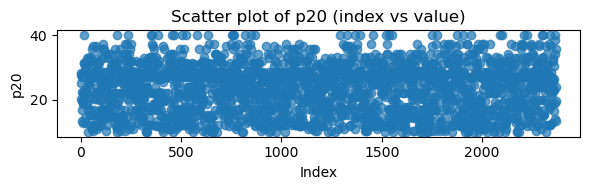

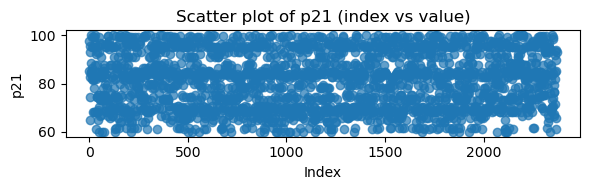

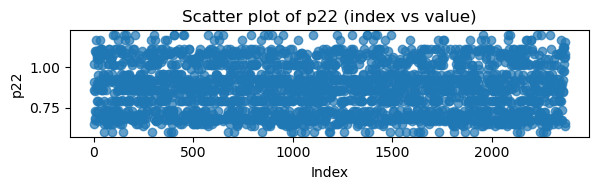

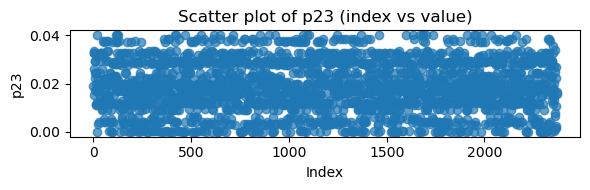

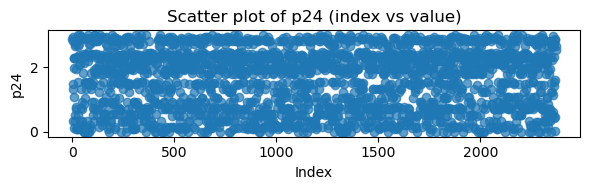

In [16]:
# Scatter plot of each numeric column (index vs value)
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    plt.scatter(df.index, df[col], alpha=0.7)
    plt.title(f'Scatter plot of {col} (index vs value)')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [6]:
def missing_report(df: pd.DataFrame):
    rep = pd.DataFrame({
        "dtype": df.dtypes.astype(str),
        "missing_count": df.isna().sum(),
        "missing_pct": df.isna().mean().round(4)
    }).sort_values("missing_pct", ascending=False)
    row_missing = pd.Series({
        "rows_total": len(df),
        "rows_any_missing": int(df.isna().any(axis=1).sum()),
        "rows_all_missing": int((df.isna().sum(axis=1) == df.shape[1]).sum())
    })
    return rep, row_missing

rep, row_missing = missing_report(df)
print(rep.head(20))
print(row_missing)

           dtype  missing_count  missing_pct
p16      float64              2       0.0008
p15      float64              2       0.0008
Ailment   object              2       0.0008
p08      float64              1       0.0004
p06      float64              1       0.0004
p09      float64              1       0.0004
p04      float64              1       0.0004
p05      float64              1       0.0004
p03      float64              1       0.0004
p17      float64              1       0.0004
p18      float64              1       0.0004
p07      float64              1       0.0004
p10      float64              1       0.0004
p13      float64              1       0.0004
p12      float64              1       0.0004
p14      float64              1       0.0004
p11      float64              1       0.0004
p21      float64              1       0.0004
p22      float64              1       0.0004
p20      float64              1       0.0004
rows_total          2371
rows_any_missing       4
rows_

In [17]:
# Fill missing values in float64 columns with the column mean (default value)
float_cols = df.select_dtypes(include=['float64']).columns
for col in float_cols:
    df[col] = df[col].fillna(df[col].mean())
print('Missing values in float64 columns have been filled with the column mean.')

df['Ailment'] = df['Ailment'].fillna('Unknown')

print('Missing values in Ailment column have been filled with "Unknown".')

Missing values in float64 columns have been filled with the column mean.
Missing values in Ailment column have been filled with "Unknown".


In [11]:
rep, row_missing = missing_report(df)
print(rep.head(20))
print(row_missing)

print("Ailment values", df['Ailment'].unique())

       dtype  missing_count  missing_pct
p01  float64              0          0.0
p02  float64              0          0.0
p03  float64              0          0.0
p04  float64              0          0.0
p05  float64              0          0.0
p06  float64              0          0.0
p07  float64              0          0.0
p08  float64              0          0.0
p09  float64              0          0.0
p10  float64              0          0.0
p11  float64              0          0.0
p12  float64              0          0.0
p13  float64              0          0.0
p14  float64              0          0.0
p15  float64              0          0.0
p16  float64              0          0.0
p17  float64              0          0.0
p18  float64              0          0.0
p19  float64              0          0.0
p20  float64              0          0.0
rows_total          2371
rows_any_missing       0
rows_all_missing       0
dtype: int64
Ailment values ['Healthy' 'Diabetes' 'Thalasse' 'An

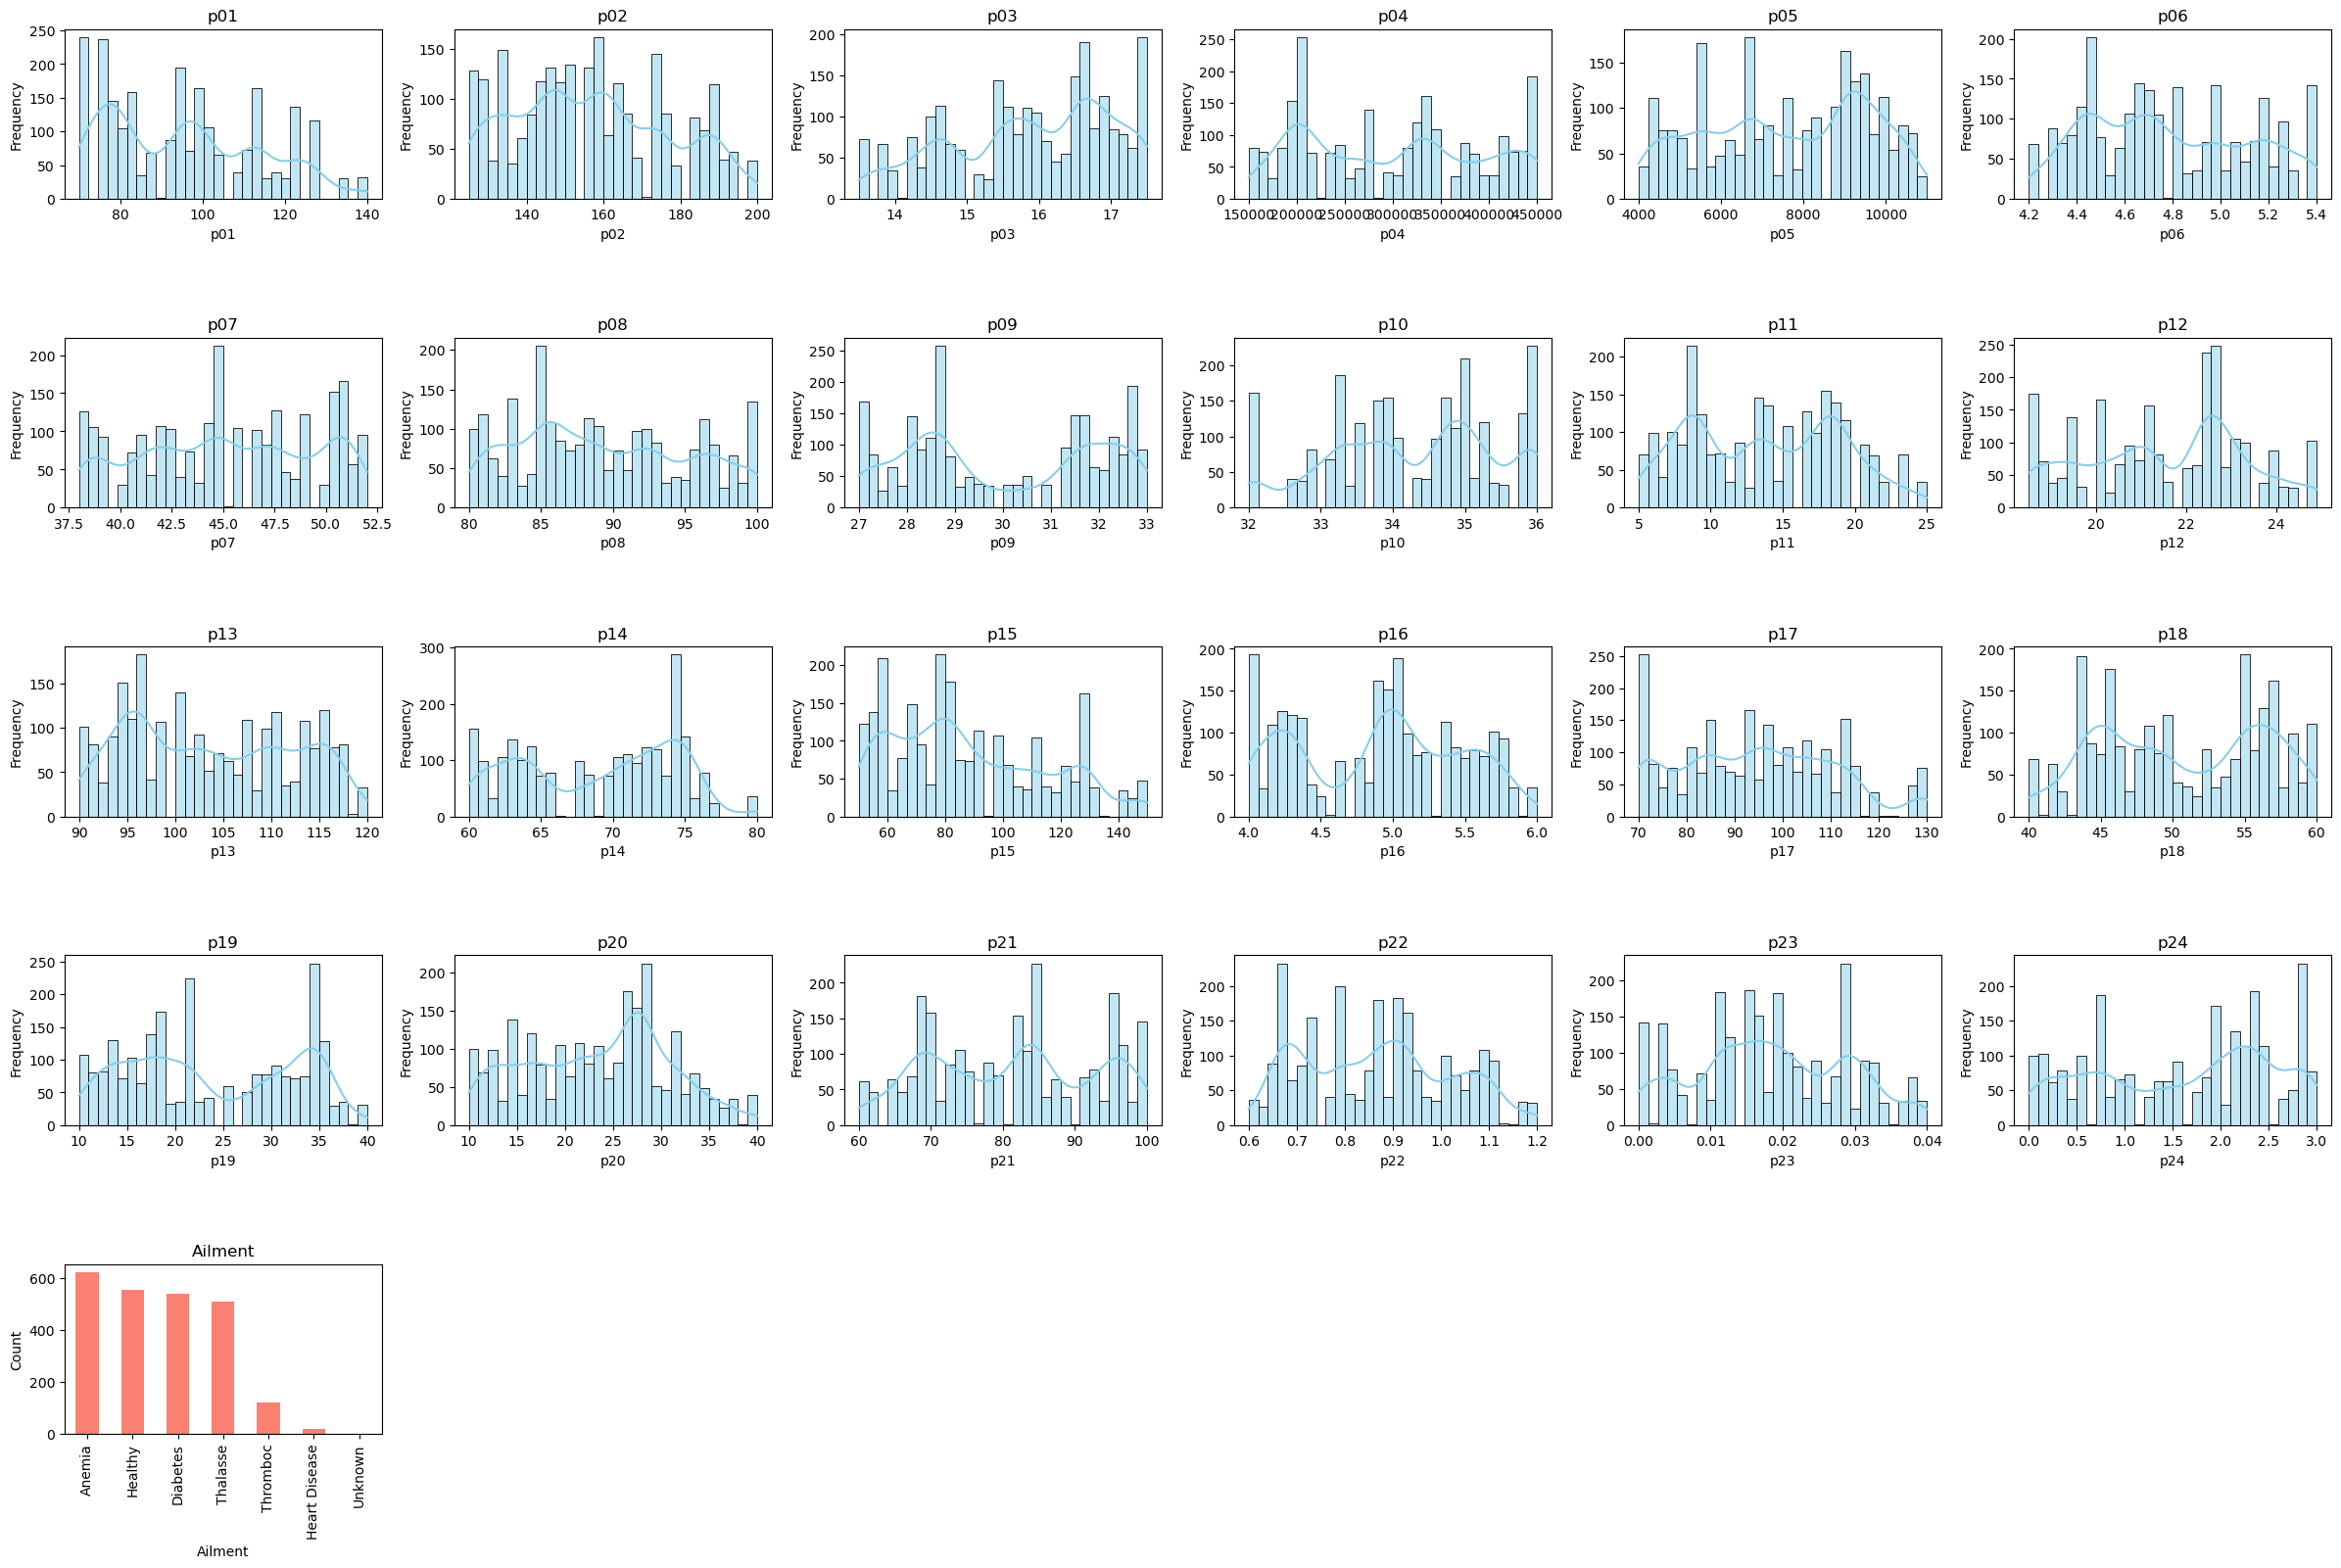

Each subplot shows a histogram+KDE for numeric columns or a bar plot for categorical columns. Review for skewness, modality, and class imbalance.


In [18]:
# Histograms and KDE plots for all columns in a 6x6 grid (6 subplots per row, up to 6 rows)

#Create histograms and KDE plots (find out what KDE plots represent) for all the columns and analyze them.Any significant conclusions?

import matplotlib.pyplot as plt
import seaborn as sns

all_cols = list(df.select_dtypes(include=[np.number, 'object', 'category']).columns)
n_plots = len(all_cols)
rows = 6
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()

for i, col in enumerate(all_cols):
    ax = axes[i]
    if df[col].dtype in ['float64', 'int64']:
        sns.histplot(df[col], kde=True, bins=30, ax=ax, color='skyblue')
        ax.set_ylabel('Frequency')
    else:
        df[col].value_counts().plot(kind='bar', ax=ax, color='salmon')
        ax.set_ylabel('Count')
    ax.set_title(col)
    ax.set_xlabel(col)

# Hide any unused subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Each subplot shows a histogram+KDE for numeric columns or a bar plot for categorical columns. Review for skewness, modality, and class imbalance.")

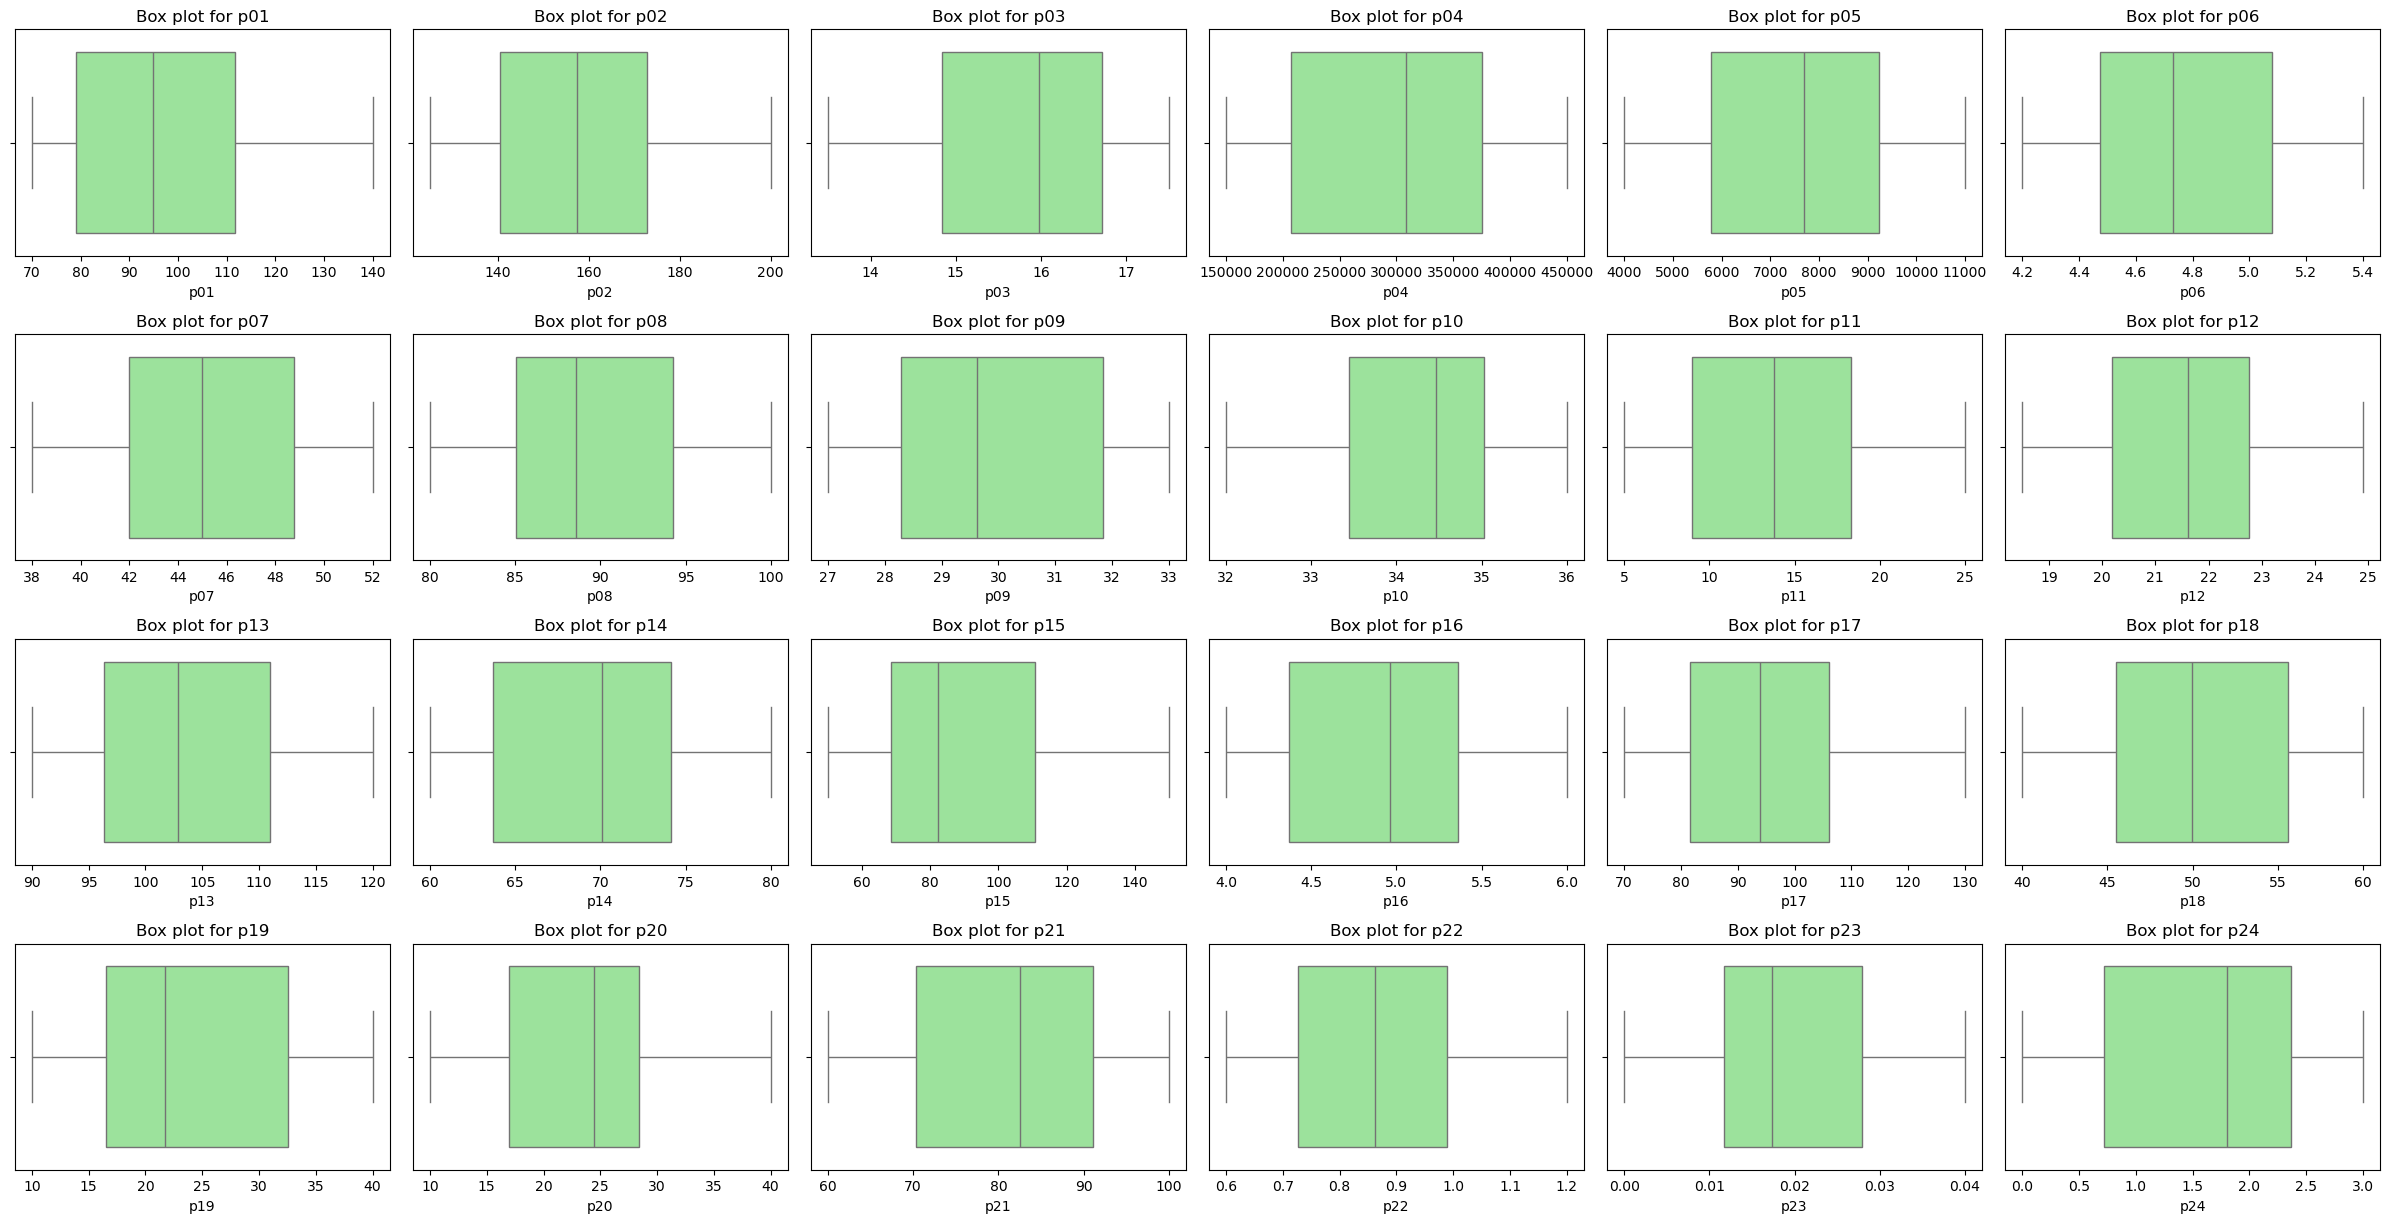

Box plots in a 6x6 grid: Review for outliers, skewness, and spread across all numeric columns.


In [ ]:
# Box plots for all numeric columns in a 6x6 grid (6 rows, 6 columns = 36 subplots max)

#Create box plots for all the columns, individually,and analyze them.What are your conclusions?


import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=[np.number]).columns[:36]  # Limit to 36 columns
rows, cols = 6, 6
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Box plot for {col}')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Box plots in a 6x6 grid: Review for outliers, skewness, and spread across all numeric columns.")

In [ ]:
# # KDE plots for all numeric columns
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Convert all columns that look numeric to numeric (if not already)
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# numeric_cols = df.select_dtypes(include=[np.number]).columns

# # plt.figure(figsize=(max(8, len(numeric_cols)*1.2), 6))
# for col in numeric_cols:
#     sns.kdeplot(df[col].dropna(), label=col, fill=True, alpha=0.3)
# plt.title('KDE Plots for All Numeric Columns')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.legend()
# plt.tight_layout()
# plt.show()

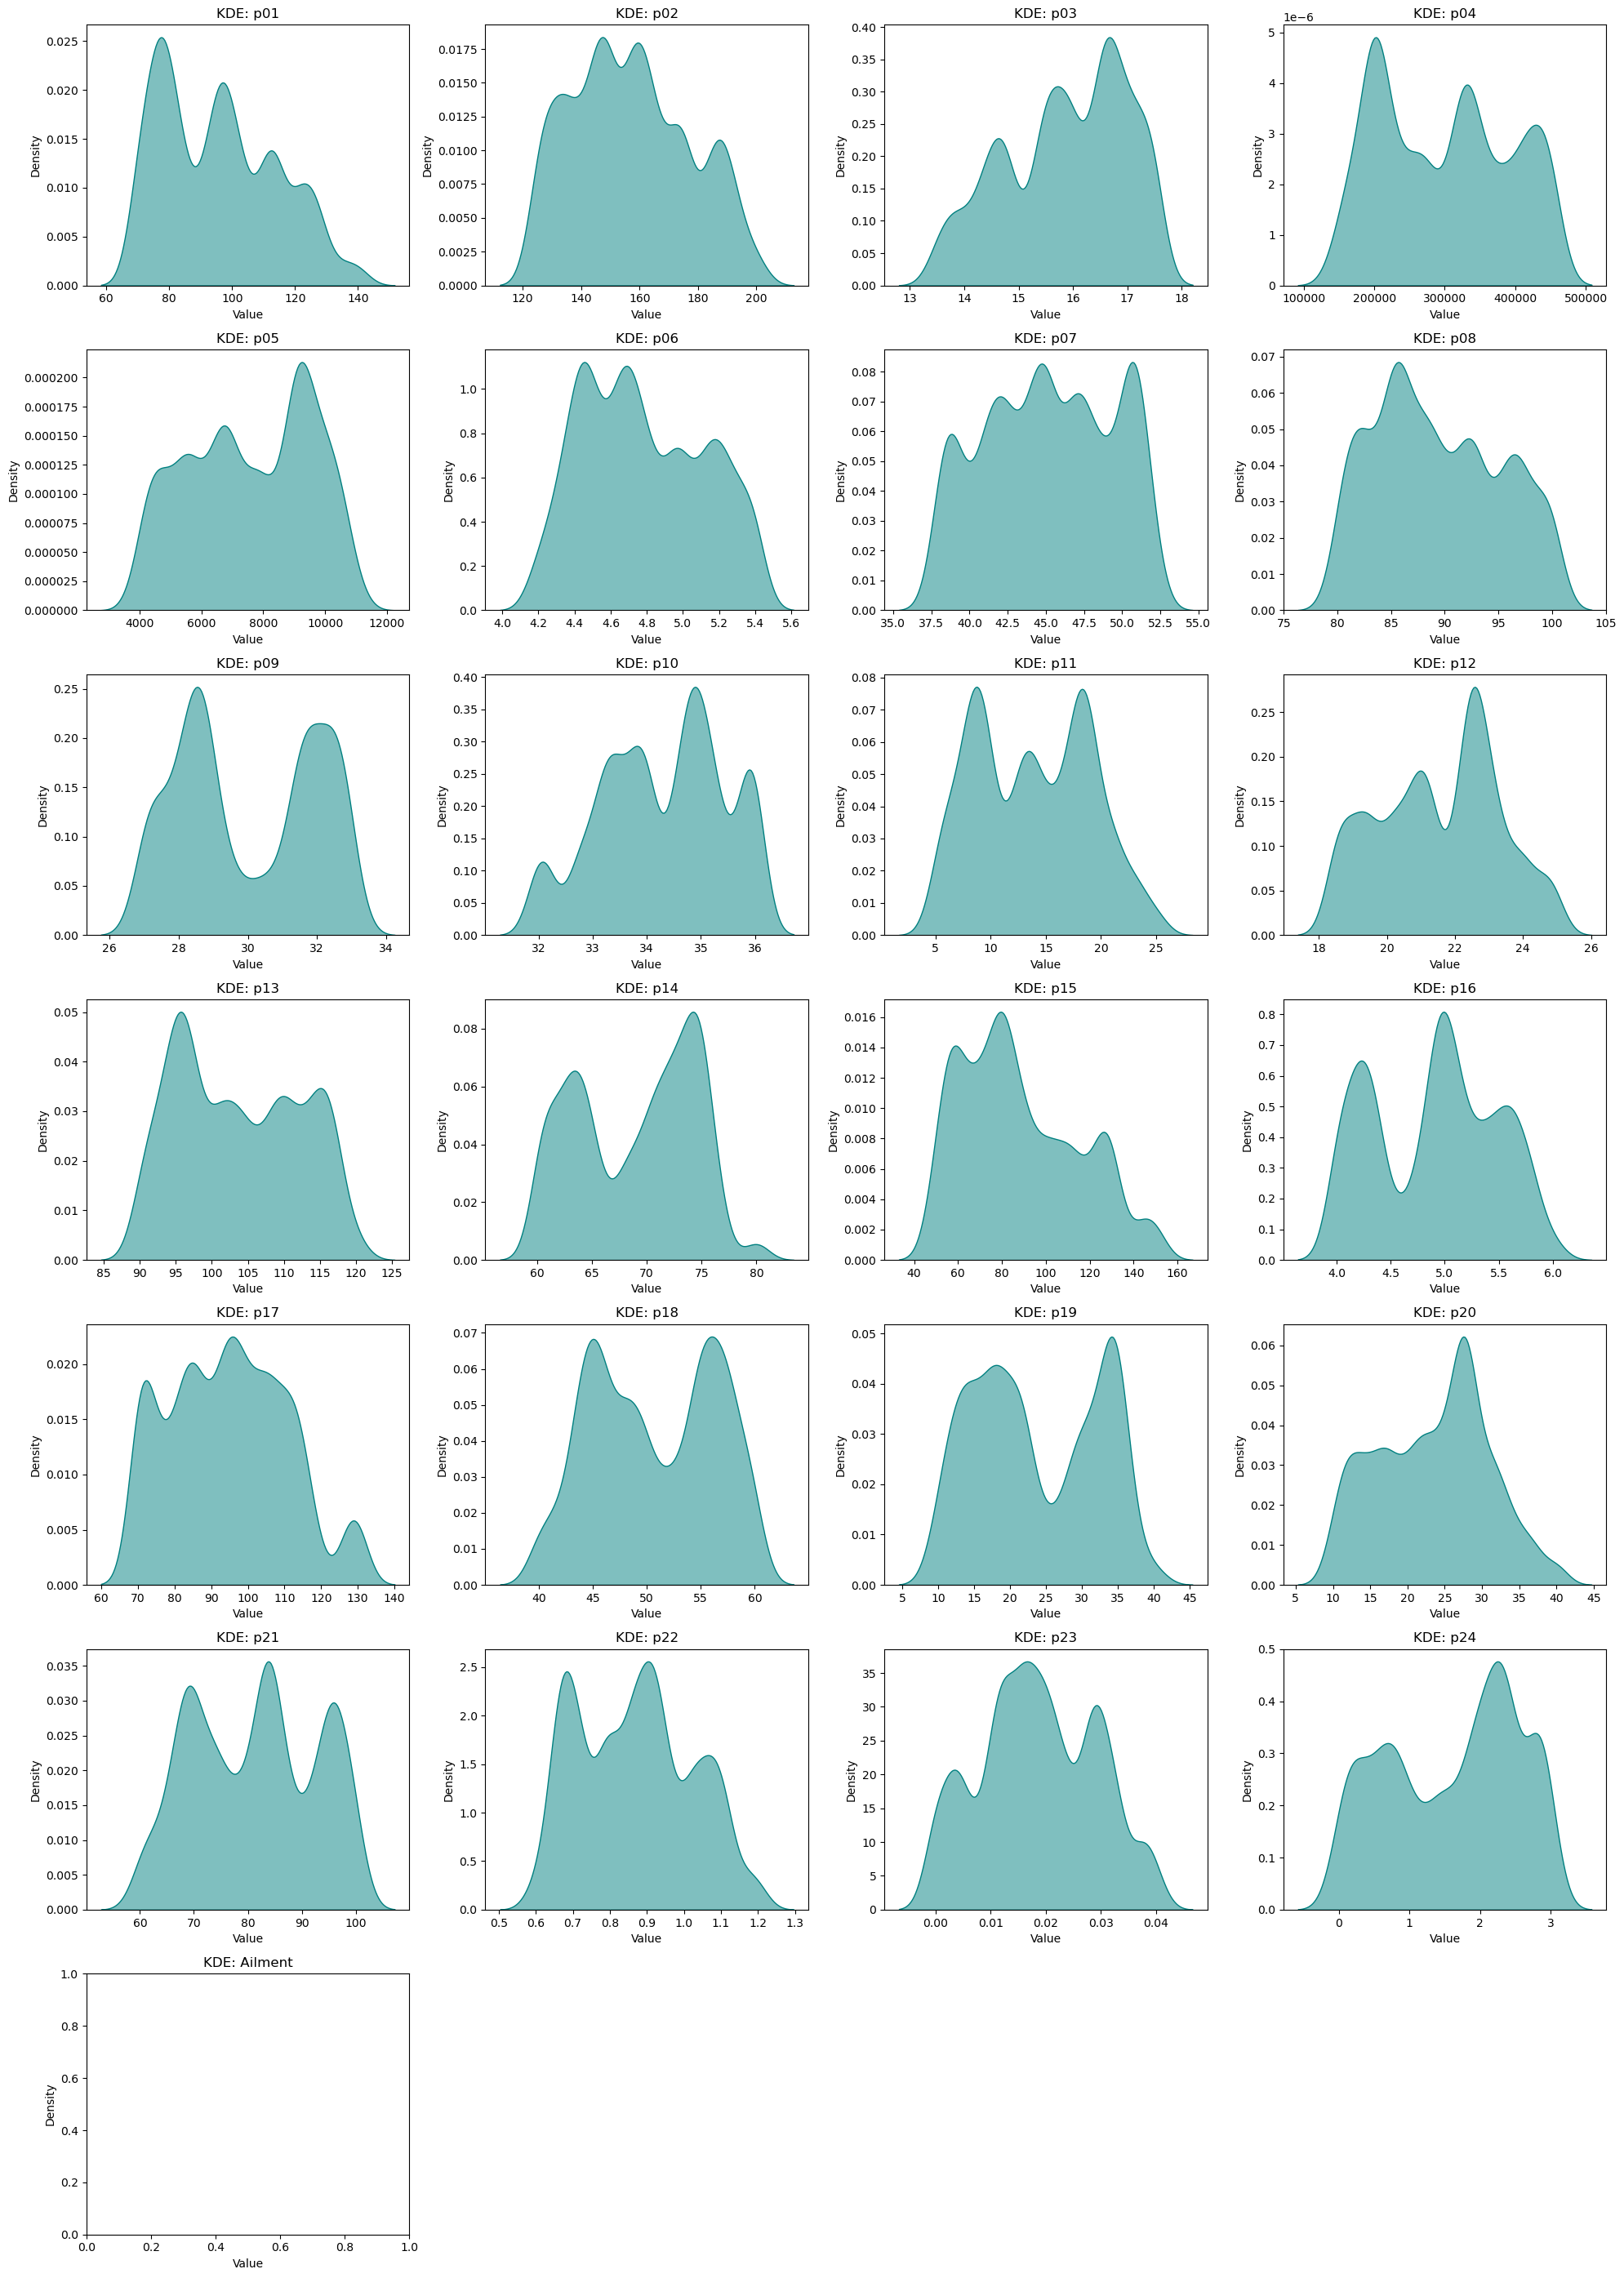

In [19]:
# KDE plots for each numeric column in a grid for better comparison
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all columns that look numeric are numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_cols)
n_rows = (n_cols + 3) // 4  # 4 plots per row

fig, axes = plt.subplots(n_rows, 4, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(df[col].dropna(), ax=axes[i], fill=True, alpha=0.5, color='teal')
    axes[i].set_title(f'KDE: {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### What do KDE plots represent?
A Kernel Density Estimate (KDE) plot is a smooth, continuous estimate of a variable's probability density function. It shows the distribution of data values, similar to a smoothed histogram, but without binning artifacts.

- **Purpose:** KDE plots help visualize the underlying distribution and shape (e.g., unimodal, bimodal, skewed) of numeric data.
- **Interpretation:** Peaks indicate where data points are concentrated. The area under the curve sums to 1, representing the probability distribution.
- **Advantage:** KDE plots provide a clearer view of the data's distribution than histograms, especially for identifying multiple modes or subtle features.

In summary: KDE plots are useful for understanding the distribution, spread, and modality of numeric variables in your dataset.

Index(['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10',
       'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20',
       'p21', 'p22', 'p23', 'p24', 'Ailment'],
      dtype='object')
p01        float64
p02        float64
p03        float64
p04        float64
p05        float64
p06        float64
p07        float64
p08        float64
p09        float64
p10        float64
p11        float64
p12        float64
p13        float64
p14        float64
p15        float64
p16        float64
p17        float64
p18        float64
p19        float64
p20        float64
p21        float64
p22        float64
p23        float64
p24        float64
Ailment    float64
dtype: object


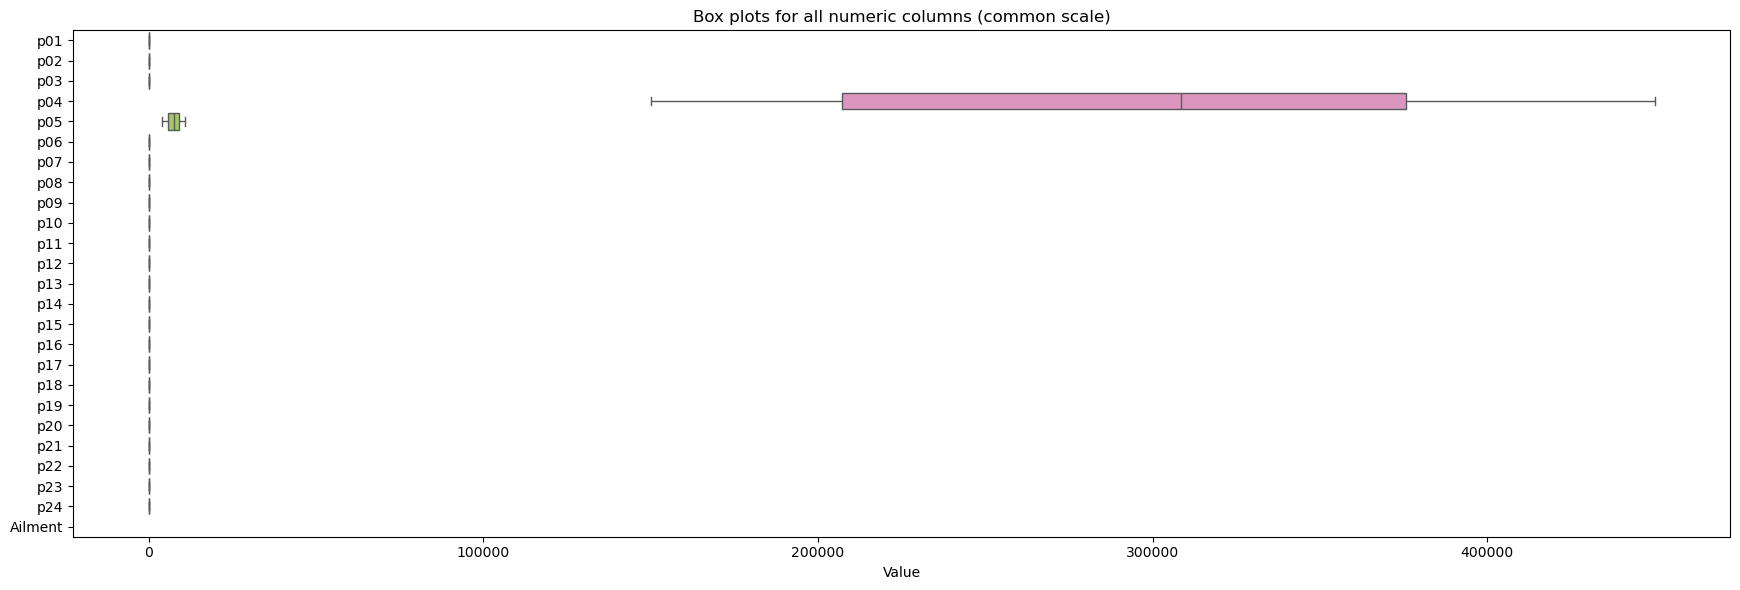

When all numeric columns are plotted on a common scale, columns with much larger or smaller ranges dominate the plot, making it hard to see the spread and outliers in columns with smaller ranges. This highlights the need for normalization or standardization before comparing or modeling features with different scales.


In [20]:
# Box plots for all numeric columns on a common scale in a single plot

#What you will observe:

# Columns with much larger ranges will dominate the plot, making it hard to see the spread and outliers in columns with smaller ranges.
# This demonstrates the importance of normalization or standardization before comparing or modeling features with different scales.

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)

print(df.dtypes)



plt.figure(figsize=(max(8, len(numeric_cols)*0.7), 6))
sns.boxplot(data=df[numeric_cols], orient='h', palette='Set2')
plt.title('Box plots for all numeric columns (common scale)')
plt.xlabel('Value')
plt.tight_layout()
plt.show()

print("When all numeric columns are plotted on a common scale, columns with much larger or smaller ranges dominate the plot, making it hard to see the spread and outliers in columns with smaller ranges. This highlights the need for normalization or standardization before comparing or modeling features with different scales.")

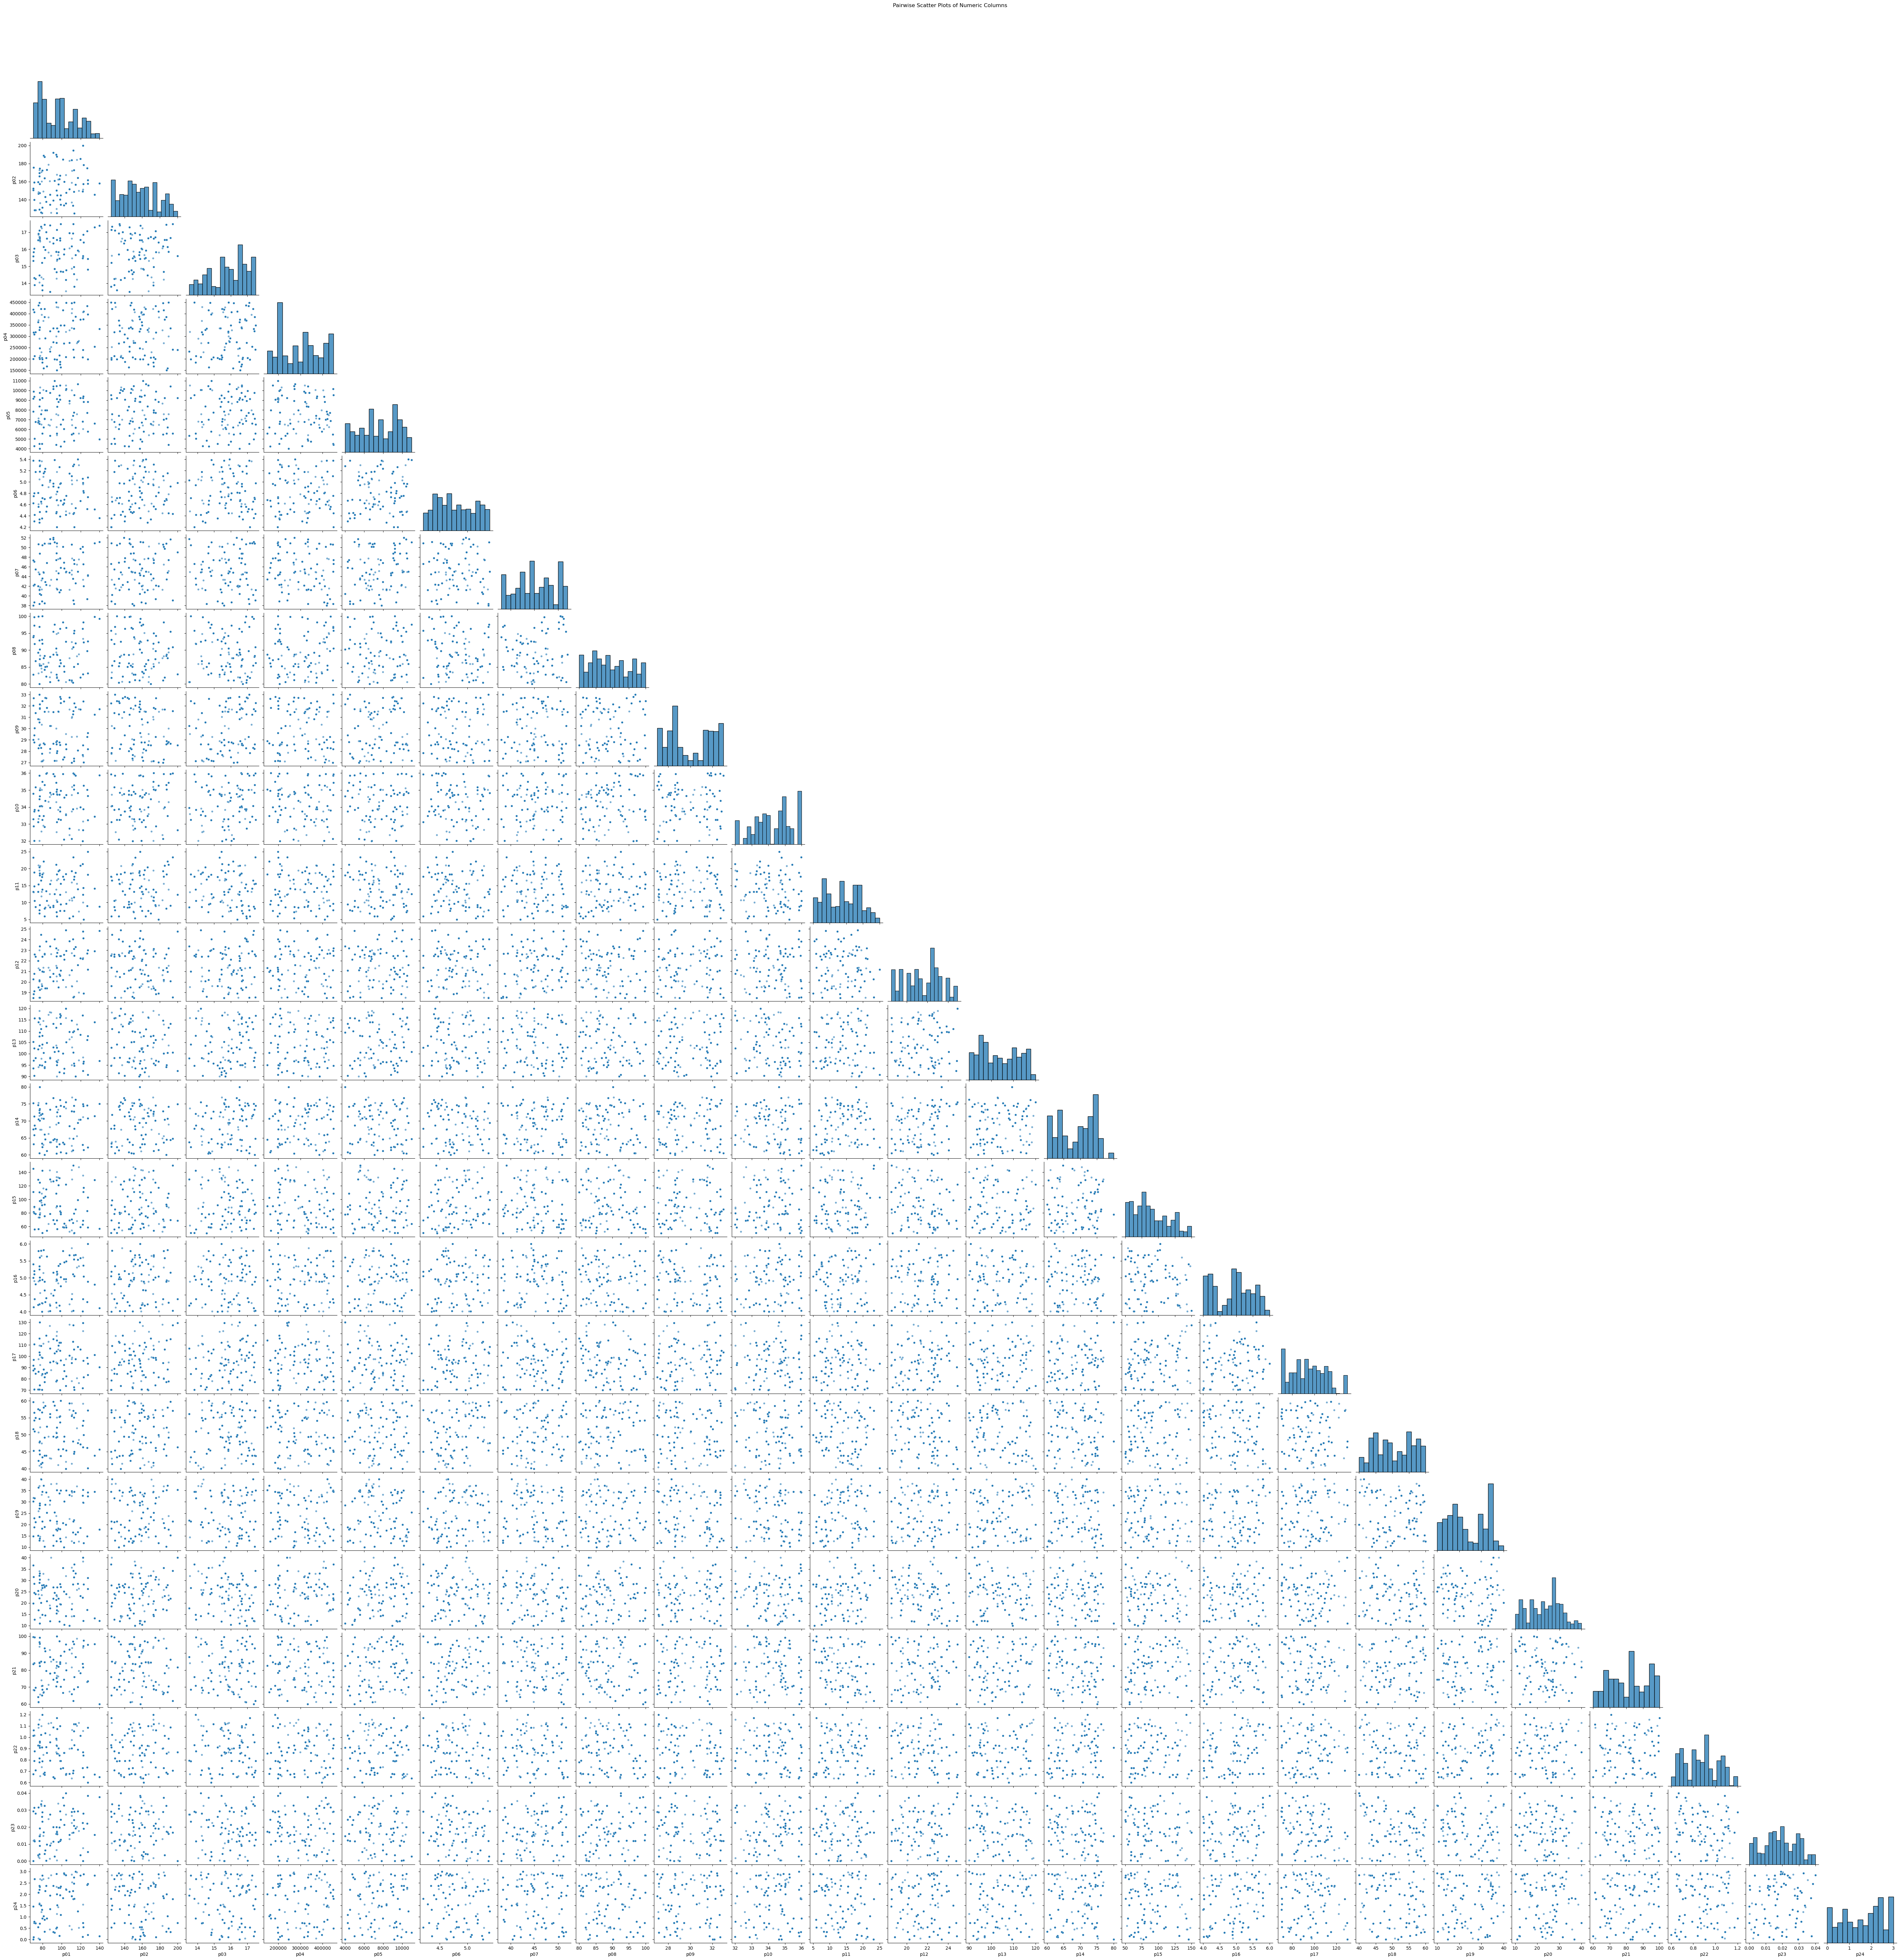

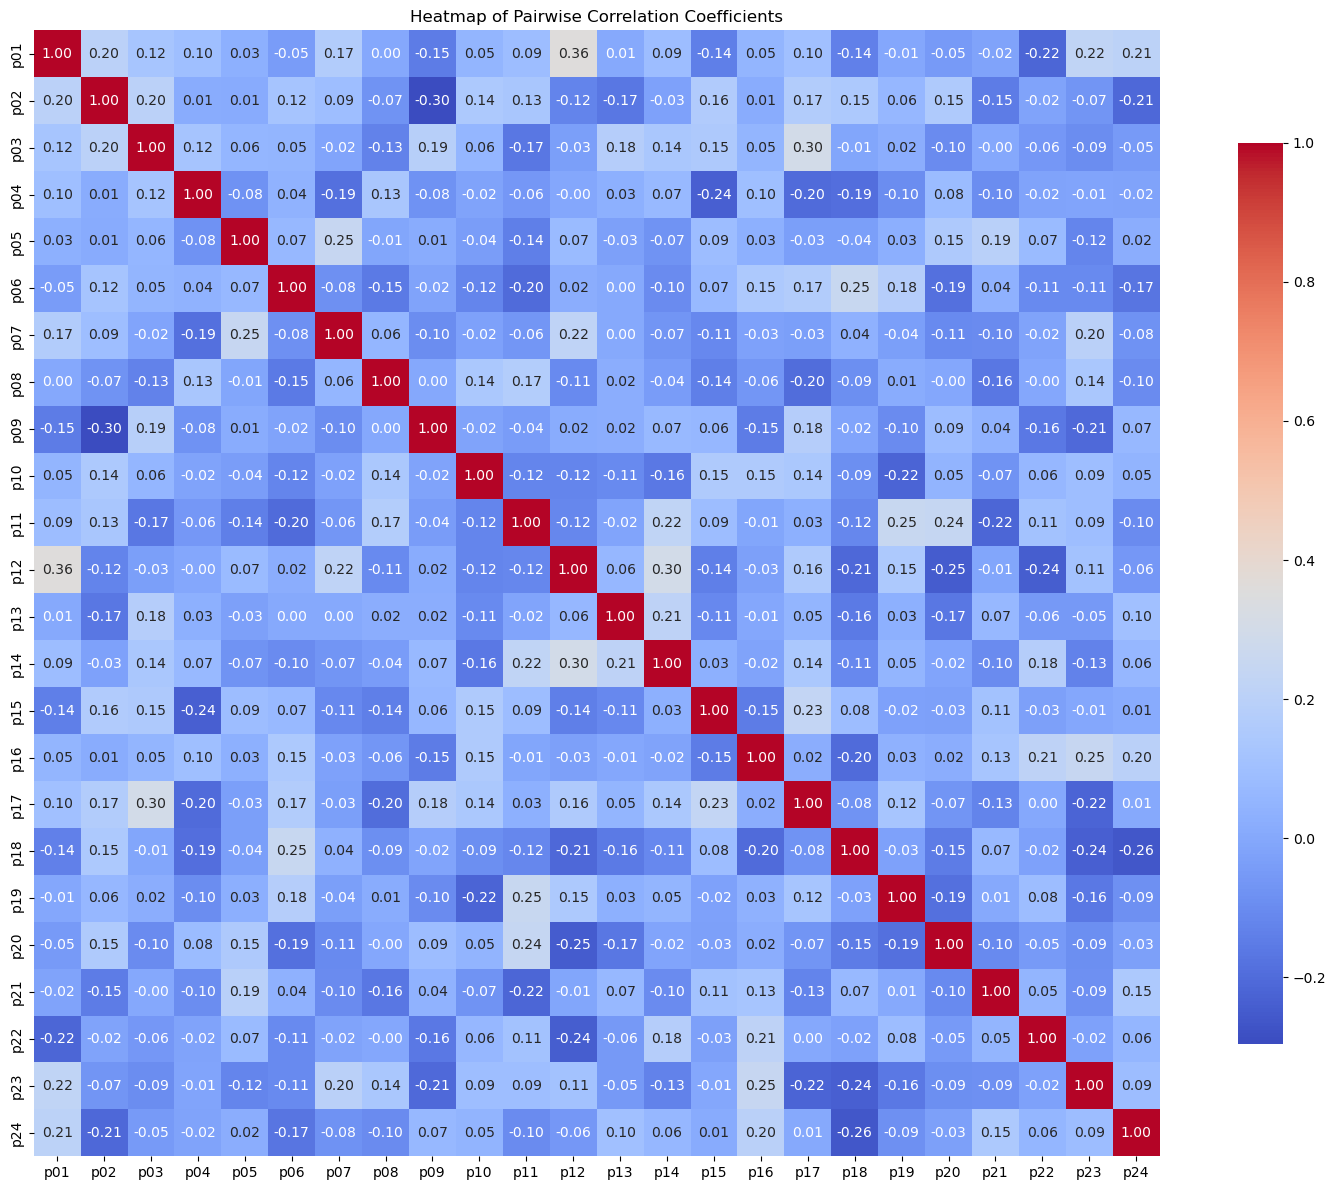

Conclusions:
- Pairwise scatter plots reveal linear/nonlinear relationships, clusters, and outliers between variables.
- The heatmap shows the strength and direction of linear relationships. High absolute values indicate strong correlation. Look for highly correlated pairs (>|0.7|) for possible redundancy or multicollinearity. Weak or no correlation (near 0) means variables are independent.


In [20]:
# Pairwise scatter plots (pairplot) for all numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[numeric_cols].dropna(), corner=True, plot_kws={'alpha':0.6, 's':20})
plt.suptitle('Pairwise Scatter Plots of Numeric Columns', y=1.02)
plt.show()

# Heatmap of pairwise correlation coefficients
corr = df[numeric_cols].corr()
plt.figure(figsize=(min(16, 1.2*len(numeric_cols)), min(12, 0.8*len(numeric_cols))))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink':0.8})
plt.title('Heatmap of Pairwise Correlation Coefficients')
plt.tight_layout()
plt.show()

print("Conclusions:")
print("- Pairwise scatter plots reveal linear/nonlinear relationships, clusters, and outliers between variables.")
print("- The heatmap shows the strength and direction of linear relationships. High absolute values indicate strong correlation. Look for highly correlated pairs (>|0.7|) for possible redundancy or multicollinearity. Weak or no correlation (near 0) means variables are independent.")

In [21]:
# Final conclusion and implementation for handling missing values
"""
Conclusion:
- For numeric (float64) columns: Impute missing values with the column mean, as this preserves all data and is robust for most distributions.
- For categorical columns (e.g., 'Ailment'): Impute missing values with a new category 'Unknown' to avoid bias and preserve all records.
- If a column or row has excessive missingness and is not critical, consider dropping it, but in this dataset, imputation is preferred.
"""

# Impute numeric columns with mean
float_cols = df.select_dtypes(include=['float64']).columns
for col in float_cols:
    df[col] = df[col].fillna(df[col].mean())

# Impute categorical columns with 'Unknown'
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

print("Missing values have been handled: numeric columns filled with mean, categorical columns filled with 'Unknown'.")

Missing values have been handled: numeric columns filled with mean, categorical columns filled with 'Unknown'.


In [22]:
# Logistic Regression model: train/test split, training, and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Choose a target column (example: 'Ailment') and encode it
# (Change target_col as needed)
target_col = 'Ailment'
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical features and target
def encode_df(X):
    X_enc = X.copy()
    for col in X_enc.select_dtypes(include=['object', 'category']).columns:
        X_enc[col] = LabelEncoder().fit_transform(X_enc[col].astype(str))
    return X_enc

X_enc = encode_df(X)
y_enc = LabelEncoder().fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, multi_class='auto')
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
train_preds = lr.predict(X_train_scaled)
test_preds = lr.predict(X_test_scaled)

# print('Train Accuracy:', accuracy_score(y_train, train_preds))
# print('Test Accuracy:', accuracy_score(y_test, test_preds))
# print('\nClassification Report (Test):')
# print(classification_report(y_test, test_preds))
# print('\nConfusion Matrix (Test):')
print(confusion_matrix(y_test, test_preds))

def print_metrics(y_true, y_pred, dataset_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n📊 {dataset_name} Metrics:")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")

# Print train and test metrics
print_metrics(y_train, train_preds, "Train")
print_metrics(y_test, test_preds, "Test")

c:\Users\pravi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

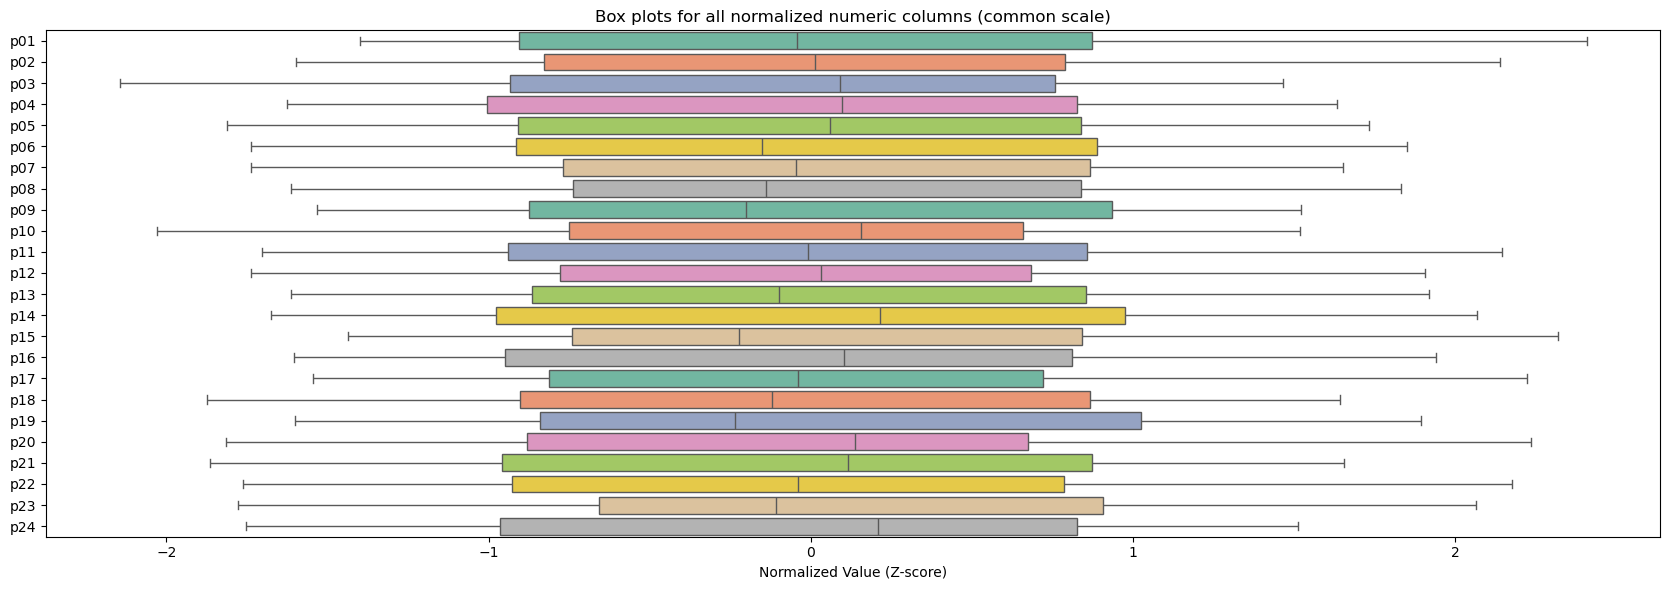

After normalization, all numeric columns are on the same scale (mean=0, std=1). This allows for direct comparison of spread and outliers across features, and prevents features with large ranges from dominating models or visualizations.


In [23]:
# Normalize numerical columns and re-create the common-scale box plot
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_norm = df.copy()
df_norm[numeric_cols] = scaler.fit_transform(df[numeric_cols])

plt.figure(figsize=(max(8, len(numeric_cols)*0.7), 6))
sns.boxplot(data=df_norm[numeric_cols], orient='h', palette='Set2')
plt.title('Box plots for all normalized numeric columns (common scale)')
plt.xlabel('Normalized Value (Z-score)')
plt.tight_layout()
plt.show()

print("After normalization, all numeric columns are on the same scale (mean=0, std=1). This allows for direct comparison of spread and outliers across features, and prevents features with large ranges from dominating models or visualizations.")

In [23]:
# Function to train and evaluate Logistic Regression with optional normalization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

def train_logreg(normalize: bool = False):
    # Prepare features and target
    target_col = 'Ailment'
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Encode categorical features and target
    def encode_df(X):
        X_enc = X.copy()
        for col in X_enc.select_dtypes(include=['object', 'category']).columns:
            X_enc[col] = LabelEncoder().fit_transform(X_enc[col].astype(str))
        return X_enc

    X_enc = encode_df(X)
    y_enc = LabelEncoder().fit_transform(y)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_enc, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

    if normalize:
        scaler = StandardScaler()
        X_train_proc = scaler.fit_transform(X_train)
        X_test_proc = scaler.transform(X_test)
    else:
        X_train_proc = X_train.values
        X_test_proc = X_test.values

    # Train Logistic Regression
    lr = LogisticRegression(max_iter=1000, multi_class='auto')
    lr.fit(X_train_proc, y_train)

    # Predict and evaluate
    train_preds = lr.predict(X_train_proc)
    test_preds = lr.predict(X_test_proc)

    print(f'\n--- Logistic Regression Results (normalize={normalize}) ---')
    print('Train Accuracy:', accuracy_score(y_train, train_preds))
    print('Test Accuracy:', accuracy_score(y_test, test_preds))
    print('\nClassification Report (Test):')
    print(classification_report(y_test, test_preds))
    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test, test_preds))

    return {
        'normalize': normalize,
        'train_accuracy': accuracy_score(y_train, train_preds),
        'test_accuracy': accuracy_score(y_test, test_preds),
        'classification_report': classification_report(y_test, test_preds, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, test_preds)
    }

# Run and compare both models
results_no_norm = train_logreg(normalize=False)
results_norm = train_logreg(normalize=True)

print('\n--- Comparison of Key Metrics ---')
print(f"Test Accuracy (No Normalization): {results_no_norm['test_accuracy']:.4f}")
print(f"Test Accuracy (With Normalization): {results_norm['test_accuracy']:.4f}")

from pandas import DataFrame
comp_df = DataFrame({
    'No Normalization': results_no_norm['classification_report']['weighted avg'],
    'With Normalization': results_norm['classification_report']['weighted avg']
}).T[['precision', 'recall', 'f1-score']]
print('\nWeighted Average Precision/Recall/F1:')
display(comp_df)

c:\Users\pravi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

### Why is encoding done on categorical columns?
Many machine learning algorithms, including Logistic Regression, require all input features to be numeric. Categorical columns contain string or object values (such as labels or categories) that cannot be directly used in mathematical computations by these algorithms.

**Encoding** transforms categorical values into numeric codes, allowing the model to process them. For example, the `LabelEncoder` assigns a unique integer to each category. This is essential because:
- Algorithms expect numeric input to compute distances, weights, and probabilities.
- Categorical data in string form cannot be interpreted mathematically.
- Encoding ensures all features are in a suitable format for model training and prediction.

> In summary: Encoding categorical columns is a necessary preprocessing step to convert non-numeric data into a form that machine learning models can use.

### Why did normalization produce higher accuracy?
Normalization (scaling numeric features to have mean 0 and standard deviation 1) can improve the accuracy of models like Logistic Regression for several reasons:

- **Equal Feature Contribution:** Without normalization, features with larger numeric ranges can dominate the model's learning process, causing the model to give more weight to those features and less to others, even if all features are equally important.
- **Faster and More Stable Convergence:** Normalized data helps optimization algorithms (like gradient descent) converge faster and more reliably, reducing the risk of getting stuck in suboptimal solutions.
- **Improved Model Coefficients:** When features are on similar scales, the model can assign more meaningful and balanced coefficients, leading to better generalization and accuracy.
- **Reduces Numerical Instability:** Large differences in feature scales can cause numerical instability and poor performance in some algorithms.

**In summary:** Normalization ensures all features contribute equally, improves the optimization process, and often leads to better model performance and higher accuracy, especially when features have very different scales.